<a href="https://colab.research.google.com/github/mhurtado28/EDA_store/blob/main/EDA_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS EXPLORATORIO DE DATOS 


1- Se importan las librerias a usar

In [ ]:
import numpy as np 
import pandas as pd
import csv
import seaborn as snb
import matplotlib.pyplot as plt


2- Importar el o los archivos en dodne estan los datos

In [ ]:
 from google.colab import files
files.upload()

Saving Stores.csv to Stores.csv


{'Stores.csv': b'\xef\xbb\xbfStore ID ,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales\r\n1,1659,1961,530,66490\r\n2,1461,1752,210,39820\r\n3,1340,1609,720,54010\r\n4,1451,1748,620,53730\r\n5,1770,2111,450,46620\r\n6,1442,1733,760,45260\r\n7,1542,1858,1030,72240\r\n8,1261,1507,1020,37720\r\n9,1090,1321,680,46310\r\n10,1030,1235,1130,44150\r\n11,1187,1439,1090,71280\r\n12,1751,2098,720,57620\r\n13,1746,2064,1050,60470\r\n14,1615,1931,1160,59130\r\n15,1469,1756,770,66360\r\n16,1644,1950,790,78870\r\n17,1578,1907,1440,77250\r\n18,1703,2045,670,38170\r\n19,1438,1731,1030,63540\r\n20,1940,2340,980,40190\r\n21,1421,1700,370,43460\r\n22,1458,1746,690,68890\r\n23,1719,2065,950,52780\r\n24,1449,1752,620,50680\r\n25,1234,1488,840,41880\r\n26,1732,2073,820,70050\r\n27,1475,1777,1100,25820\r\n28,1390,1648,980,60530\r\n29,1642,1943,710,78100\r\n30,1715,2071,650,84860\r\n31,1439,1746,990,80140\r\n32,1250,1508,990,14920\r\n33,1331,1608,880,60460\r\n34,1784,2163,620,74560\r\n35,1375,1648,1

In [ ]:
df = pd.read_csv('Stores.csv')

print(df)

     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
..         ...         ...              ...                   ...          ...
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340

[896 rows x 5 columns]


3- Sigue una limpieza de datos. Para este ejemplo, se hará observando los mínimos y máximos de las distintas variables. 

Esto con el fin de buscar valores atípicos o errores de digitación en los datos. Este paso se puede hacer de muchas maneras, como observar el dataframe detenidamente o generar graficas de la distribución de los datos. Lo importante es que nos asegure que los datos estan correctos para trabajarlos. 


In [ ]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


4- Sigue visualizar como estan distribuidos los datos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


El valor de Kurtosis es -0.4561162738445872
El valor de Asimetria es 0.14879364291055253


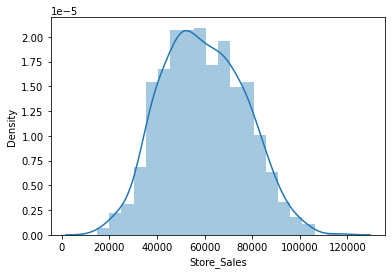

In [ ]:
snb.distplot(df['Store_Sales'])

k = df['Store_Sales'].kurt()
print('El valor de Kurtosis es',k)
s = df['Store_Sales'].skew()
print('El valor de Asimetria es',s)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


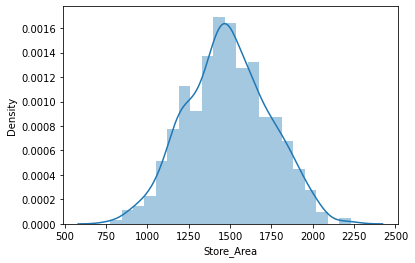

In [ ]:
snb.distplot(df['Store_Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


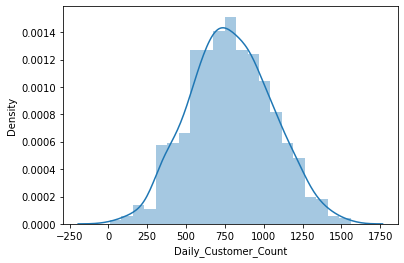

In [ ]:
snb.distplot(df['Daily_Customer_Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


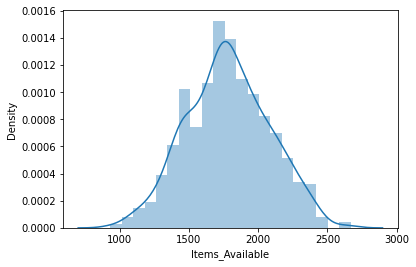

In [ ]:
snb.distplot(df['Items_Available'])

# **Tabla de correlación**

In [ ]:
cordata = df.corr()
cordata

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


Al observar la tabla de correlación, podemos afirmar lo siguiente:

*   No hay correlacion fuerte entre las ventas y las demas variables
*   Existe correlación entre el área de la tienda y la disponibilidad de Items

(Graficos con la librería SeaBorn)

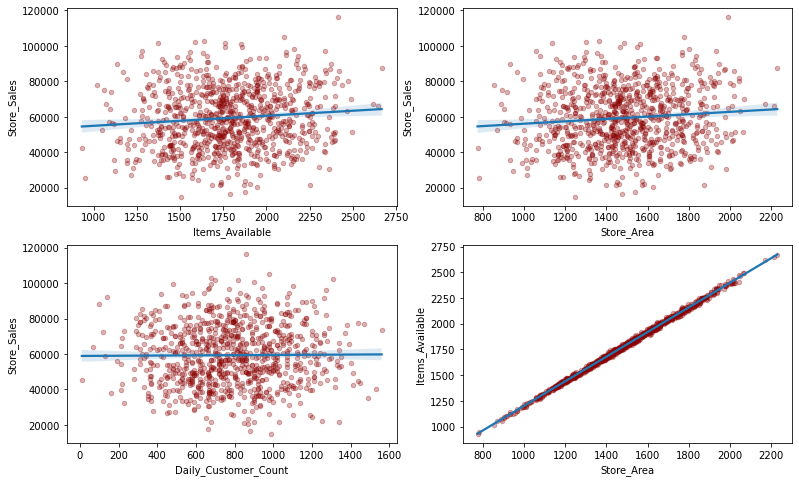

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (13,8))

snb.regplot(x = df['Items_Available'], y = df['Store_Sales'], scatter_kws={"color":"darkred","alpha":0.3,"s":20}, ax=axes[0,0])
snb.regplot(x = df['Store_Area'], y = df['Store_Sales'], scatter_kws={"color":"darkred","alpha":0.3,"s":20}, ax=axes[0,1])
snb.regplot(x = df['Daily_Customer_Count'], y = df['Store_Sales'], scatter_kws={"color":"darkred","alpha":0.3,"s":20}, ax=axes[1,0])
snb.regplot(x = df['Store_Area'], y = df['Items_Available'], scatter_kws={"color":"darkred","alpha":0.3,"s":20}, ax=axes[1,1])


**ideas a realizar con base a la visualización**

*Es posible calcular cuantos items puedo tener en un supermecado, de acuerdo con el área 

## **ITMES VS AREA** 
###REGRESION 

[1.19702285 3.9664857 ]


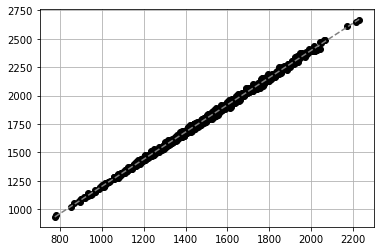

In [ ]:

xt = data['Store_Area']
yt = data['Items_Available']

B    = np.polyfit( xt, yt, deg = 1 )
xfit = np.linspace(np.min(xt),np.max(xt),30)
yfit = np.polyval(B,xfit)

print(B)

plt.figure()
plt.plot(xt,yt,"ok")
plt.plot(xfit,yfit,"--",color="gray")
plt.grid()

plt.text(4,6, 'Hello World!', fontsize=20, color='green')


**Es posible calcular la cantidad de Items que pueden ocupar un supermecado, sabiendo el área de este.**

*Items disponibles(#) = 3.96 +  (1.19*Area)

In [ ]:
area = 2200 

items = 3.9664857 + 1.19702285*area
print(items)

2637.4167556999996
